<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbours

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset
df = pd.read_csv('Zoo.csv')

In [ ]:
# Analyze the data using Visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


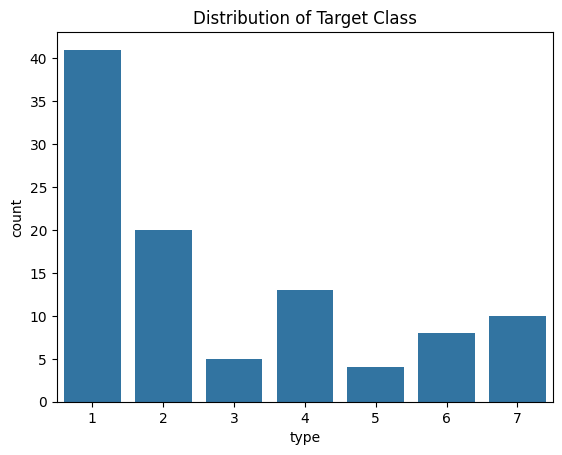

In [ ]:
# Visualizing the distribution of target class
sns.countplot(x='type', data=df)
plt.title('Distribution of Target Class')
plt.show()

In [ ]:
# pairplot for visualizing relationships between features
sns.pairplot(df, hue='type')
plt.show()

In [ ]:
# Preprocess the data
# Handling missing values using Simple imputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# Checking for missing values after imputation
missing_values = df_imputed.isnull().sum()
print(missing_values)

In [ ]:
# Splt the dataset into training and testing sets(80% training, 20% test)
X = df_imputed.drop(['type', 'animal name'], axis=1) # Drop 'animal name' column
y = df_imputed['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Implement the K-nearest Neighbours algorithm using scikit-learn
# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert the target variable to a suitable type (e.g., integer or string)
y_train = y_train.astype(int) #or str depending on the nature of your data
y_test = y_test.astype(int) #or str depending on the nature of your data

In [ ]:
# Choose an appropriate distance metric and value of k
# You can tune 'k' using cross-validation or grid search.strt with k=5 and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the classifier's performence on the testing set
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Metrics: Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(conf_matrix)

In [ ]:
# VIsualize the decison boundaries of the classifier
# for visualizing use first two features in dataset
# modify the feature selection below based on your actual dataset
X_train_2d = X_train_scaled[:, :2]
X_test_2d = X_test_scaled[:, :2]

In [ ]:
# Train a KNN classifier using 2D Features
knn_2d = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2d.fit(X_train_2d, y_train)

In [ ]:
# Plotting the decision boundaries
h = .02  # Step size in mesh grid

# Create a mesh grid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1 # Define y_min and y_max similar to x_min and x_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
# Predict the labels for each point in the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



In [ ]:
# Plot the contour and scatter plot
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of KNN Classifier')
plt.show()

# Interview Questions



1.  Key Hyperparameters in KNN:
     * n_neighbors: The number of neighbors to consider when classifying a point.
     * metric: The distance metric used (e.g., Euclidean, Manhattan).
     * weights: Determines how the contribution of each neighbor is weighted (uniform or distance-based).   
     * algorithm: The algorithm used to compute the nearest neighbors (e.g., 'auto', 'ball_tree', 'kd_tree', 'brute').

2.   Distance Metrics Used in KNN:

    * Euclidean distance: Standard distance measure for most KNN applications.
    * Manhattan distance: The sum of the absolute differences between coordinates.
    * Minkowski distance: A generalization of both Euclidean and Manhattan distances.
    * Cosine similarity: Measures the cosine of the angle between two vectors.



